In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import datetime as dt
from lightweight_charts import Chart

In [4]:
# Descargar datos del contrato futuro del euro (simulación: usaremos EUR/USD Spot como aproximación)
def descargar_datos_forex(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    df_nuevo = pd.DataFrame()
    df_nuevo['Date'] = data['Date']
    df_nuevo['Open'] = data['Open']
    df_nuevo['High'] = data['High']
    df_nuevo['Low'] = data['Low']
    df_nuevo['Close'] = data['Close']
    return df_nuevo


In [60]:
start=dt.datetime(2001,1,1)
end = dt.datetime.now()
df = descargar_datos_forex('6E=F', start, end)


[*********************100%***********************]  1 of 1 completed


In [87]:
df

Date     Open     High      Low    Close  month
0    2001-01-02  0.93910  0.95750  0.94760  0.95470      1
1    2001-01-03  0.94760  0.96120  0.93850  0.95720      1
2    2001-01-04  0.95720  0.95740  0.95150  0.95620      1
3    2001-01-05  0.95280  0.96360  0.95730  0.96330      1
4    2001-01-08  0.95730  0.96360  0.95450  0.95570      1
...         ...      ...      ...      ...      ...    ...
6047 2024-12-06  1.05900  1.06335  1.05455  1.05575     12
6048 2024-12-09  1.05655  1.05975  1.05350  1.05575     12
6049 2024-12-10  1.05590  1.05705  1.05010  1.05290     12
6050 2024-12-11  1.05290  1.05415  1.04820  1.04935     12
6051 2024-12-12  1.04990  1.05315  1.04645  1.04855     12

[6052 rows x 6 columns]

In [63]:
# Asegúrate de que 'date' está en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
# Crear una columna para el mes
df['month'] = df['Date'].dt.month

In [17]:
# Agrupar por mes y calcular estadísticas relevantes
df_monthly = df.groupby('month').mean(numeric_only=True).reset_index()

KeyError: 'month'

In [101]:
df_monthly

month      Open      High       Low     Close
0       1  1.201082  1.205945  1.195289  1.200551
1       2  1.196544  1.201498  1.191459  1.196534
2       3  1.197933  1.203302  1.192607  1.197856
3       4  1.201037  1.205760  1.196431  1.201478
4       5  1.198594  1.203351  1.193381  1.198287
5       6  1.200845  1.206194  1.195537  1.201066
6       7  1.202316  1.207045  1.197431  1.202267
7       8  1.202800  1.207533  1.197914  1.202608
8       9  1.202836  1.208088  1.197698  1.202906
9      10  1.201000  1.205804  1.195800  1.200742
10     11  1.196763  1.202171  1.191454  1.196713
11     12  1.210451  1.216051  1.205906  1.211016

In [69]:
# ===== Usando Plotly =====
fig = px.line(df_monthly, x='month', y='Close', markers=True, 
              labels={'month': 'Mes', 'Precio': 'Precio Promedio'},
              title='Promedio Estacional de Precios de Futuros por Mes')

# Cambiar etiquetas de los meses
fig.update_xaxes(ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
                 tickvals=list(range(1, 13)))

fig.show()

### Voy a calcular la estacionalidad con granularidad para tener más precicisión

In [92]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

[*********************100%***********************]  1 of 1 completed

     M-D  multiplier   cumprod
0  01-02    0.997878  0.997878
1  01-03    0.998858  0.996739
2  01-04    0.999817  0.996557
3  01-05    0.997453  0.994018
4  01-06    0.999863  0.993882
5  01-07    0.999168  0.993055
6  01-08    1.000037  0.993091
7  01-09    0.999038  0.992136
8  01-10    1.002139  0.994258
9  01-11    1.001268  0.995519


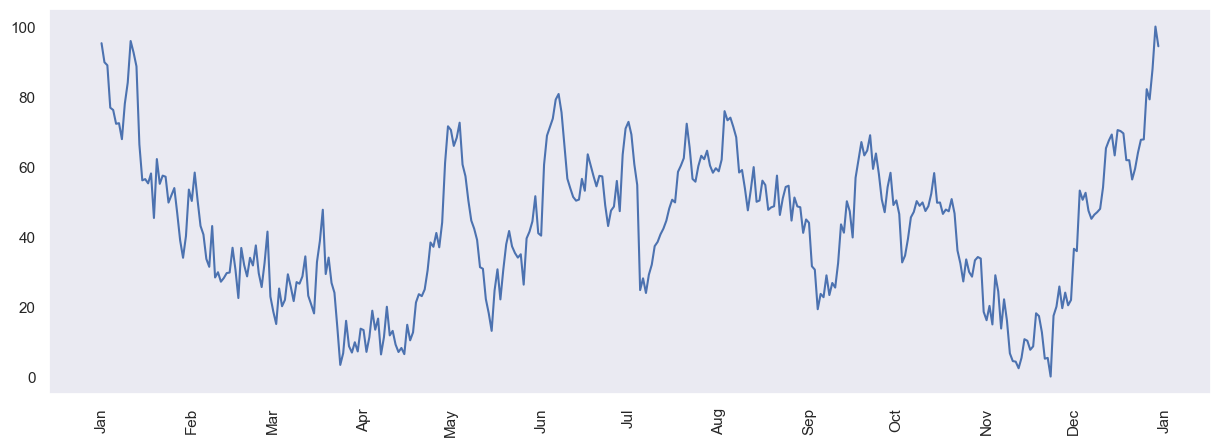

In [19]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)  # None means unlimited rows

ticker = "6E=F"

# Calculate the dates for download
start=dt.datetime(2001,1,1)
end = dt.datetime.now()

# Format the dates as strings
start_date_str = start.strftime("%Y-%m-%d")
end_date_str = end.strftime("%Y-%m-%d")

# Download the daily data
df = yf.download(ticker, start=start_date_str, end=end_date_str, interval="1d")

# Calculate the multiplier column
df["multiplier"] = df["Close"] / df["Open"]

# Format the M-D column
df["M-D"] = df.index.strftime("%m-%d")  # Change index format to month-day

# Group by M-D and calculate the means of the associated multiplier values
grouped_df = df.groupby("M-D")["multiplier"].mean()
grouped_df = grouped_df.reset_index()

# Calculate the cumulative product
grouped_df["cumprod"] = grouped_df["multiplier"].cumprod()
print(grouped_df.head(10))

# Normalize the y-axis from 0 to 100b
max_cumprod = grouped_df["cumprod"].max()
min_cumprod = grouped_df["cumprod"].min()
grouped_df["normalized"] = ((grouped_df["cumprod"] - min_cumprod) / (max_cumprod - min_cumprod)) * 100

grouped_df.to_excel('6f_plot.xlsx')

# Set figure size to make the plot longer
plt.figure(figsize=(15, 5))  # Width = 15, Height = 8

# Plot the results
plt.plot(grouped_df["M-D"], grouped_df["normalized"])

# Format the x-axis to show full month name and year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b"))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=90)

plt.show()

#### Ahora en plotly

In [110]:
# Paso 1: Añadir un año ficticio (por ejemplo, 2000)
grouped_df['M-D'] = '2000-' + grouped_df['M-D']

# Paso 2: Convertir a datetime
grouped_df['M-D'] = pd.to_datetime(grouped_df['M-D'], format='%Y-%m-%d')

In [118]:
# Graficar con Plotly
fig = px.line(
    grouped_df,
    x="M-D",
    y="normalized",
    title="Tendencia Estacional del EUR 6E=F",
    template="plotly_dark"
)

# Personalizar el diseño
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickformat="%B", 
        title="Mes"
    ),
    yaxis=dict(title="Tendencia Normalizada (0-100)")
)

# Mostrar el gráfico
fig.update_traces(connectgaps=True)
fig.show()


### Histograma

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import datetime as dt

In [41]:
# Descargar datos del contrato futuro del euro (simulación: usaremos EUR/USD Spot como aproximación)
def descargar_datos_forex(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    df_nuevo = pd.DataFrame()
    df_nuevo['Date'] = data['Date']
    df_nuevo['Open'] = data['Open']
    df_nuevo['High'] = data['High']
    df_nuevo['Low'] = data['Low']
    df_nuevo['Close'] = data['Close']
    return df_nuevo


In [42]:
start=dt.datetime(2001,1,1)
end = dt.datetime.now()
df = descargar_datos_forex('6E=F', start, end)
df.head(10)

[*********************100%***********************]  1 of 1 completed


Date    Open    High     Low   Close
0 2001-01-02  0.9391  0.9575  0.9476  0.9547
1 2001-01-03  0.9476  0.9612  0.9385  0.9572
2 2001-01-04  0.9572  0.9574  0.9515  0.9562
3 2001-01-05  0.9528  0.9636  0.9573  0.9633
4 2001-01-08  0.9573  0.9636  0.9545  0.9557
5 2001-01-09  0.9573  0.9485  0.9460  0.9463
6 2001-01-10  0.9463  0.9485  0.9446  0.9450
7 2001-01-11  0.9463  0.9603  0.9557  0.9588
8 2001-01-12  0.9560  0.9580  0.9534  0.9540
9 2001-01-16  0.9565  0.9473  0.9435  0.9473

In [43]:
# Format the M-D column
df['Date'] = pd.to_datetime(df['Date'])
df['Month-day'] = df['Date'].dt.strftime("%m-%d")
df['Return'] = df['Close'].pct_change().fillna(0)
df.head(10)

Date    Open    High     Low   Close Month-day    Return
0 2001-01-02  0.9391  0.9575  0.9476  0.9547     01-02  0.000000
1 2001-01-03  0.9476  0.9612  0.9385  0.9572     01-03  0.002619
2 2001-01-04  0.9572  0.9574  0.9515  0.9562     01-04 -0.001045
3 2001-01-05  0.9528  0.9636  0.9573  0.9633     01-05  0.007425
4 2001-01-08  0.9573  0.9636  0.9545  0.9557     01-08 -0.007890
5 2001-01-09  0.9573  0.9485  0.9460  0.9463     01-09 -0.009836
6 2001-01-10  0.9463  0.9485  0.9446  0.9450     01-10 -0.001374
7 2001-01-11  0.9463  0.9603  0.9557  0.9588     01-11  0.014603
8 2001-01-12  0.9560  0.9580  0.9534  0.9540     01-12 -0.005006
9 2001-01-16  0.9565  0.9473  0.9435  0.9473     01-16 -0.007023

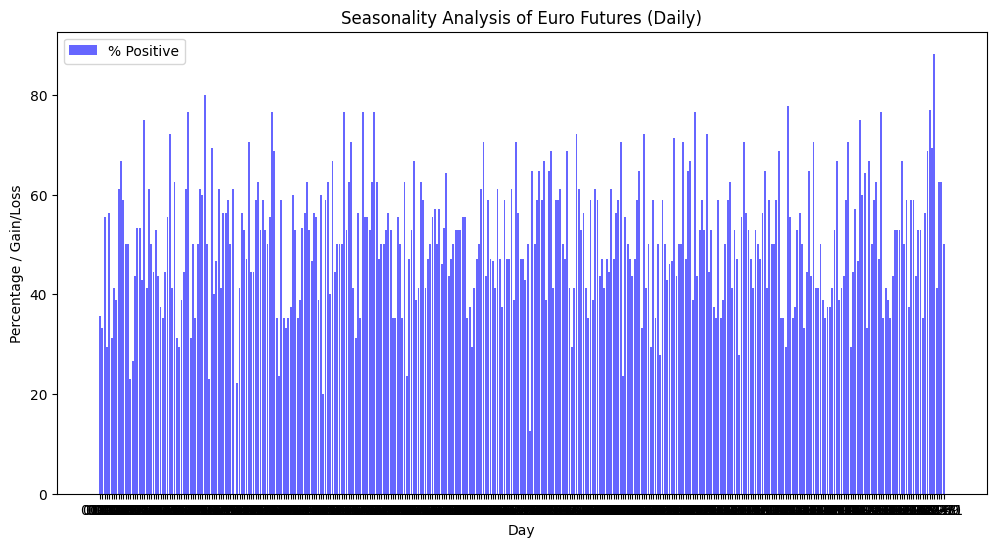

In [44]:
# Agrupar por día-mes y calcular estadísticas
daily_seasonality = df.groupby('Month-day').agg(
    count=('Return', 'count'),
    positive=('Return', lambda x: (x > 0).sum()),
    average_gain_loss=('Return', lambda x: x.mean())
)

# Calcular porcentaje de tiempo positivo y promedio de ganancias/pérdidas
daily_seasonality['Percentage_Positive'] = (daily_seasonality['positive'] / daily_seasonality['count']) * 100
daily_seasonality['Average_Gain_Loss'] = daily_seasonality['average_gain_loss']

# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
plt.bar(daily_seasonality.index, daily_seasonality['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage / Gain/Loss')
plt.title('Seasonality Analysis of Euro Futures (Daily)')
plt.legend()
plt.show()


In [1]:
#daily_seasonality.to_excel('seasonal_info_euro.xlsx')

### Vamos a ver los meses de forma individual

In [48]:
jan = daily_seasonality[daily_seasonality.index.str.contains("01-")]
feb = daily_seasonality[daily_seasonality.index.str.contains("02-")]
March = daily_seasonality[daily_seasonality.index.str.contains("03-")]
April = daily_seasonality[daily_seasonality.index.str.contains("04-")]
May = daily_seasonality[daily_seasonality.index.str.contains("05-")]
June = daily_seasonality[daily_seasonality.index.str.contains("06-")]
July = daily_seasonality[daily_seasonality.index.str.contains("07-")]
Aug = daily_seasonality[daily_seasonality.index.str.contains("08-")]
Sept = daily_seasonality[daily_seasonality.index.str.contains("09-")]
oct = daily_seasonality[daily_seasonality.index.str.contains("10-")]
Nov = daily_seasonality[daily_seasonality.index.str.contains("11-")]
Dec = daily_seasonality[daily_seasonality.index.str.contains("12-")]


### Enero

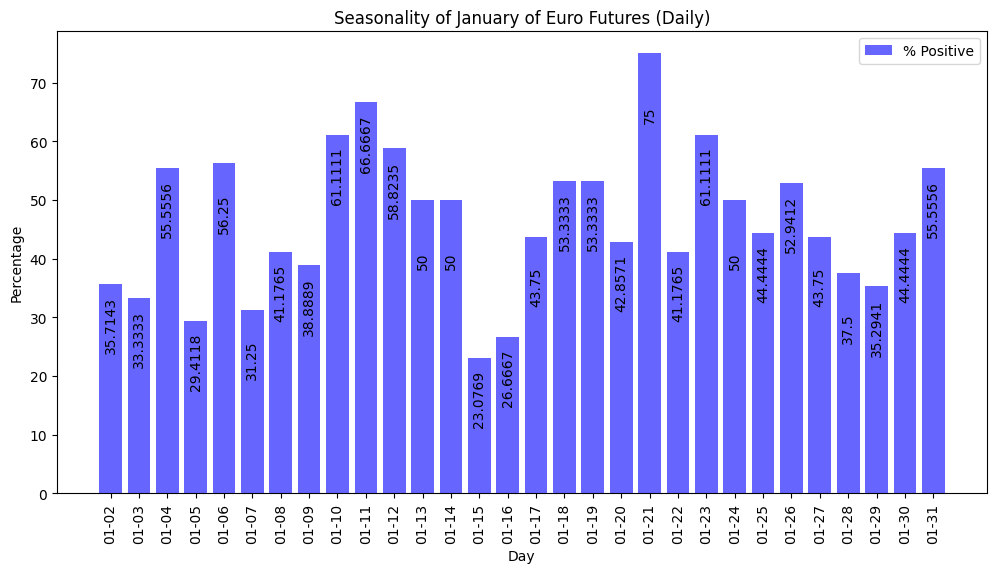

In [49]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(jan.index, jan['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of January of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Febrero

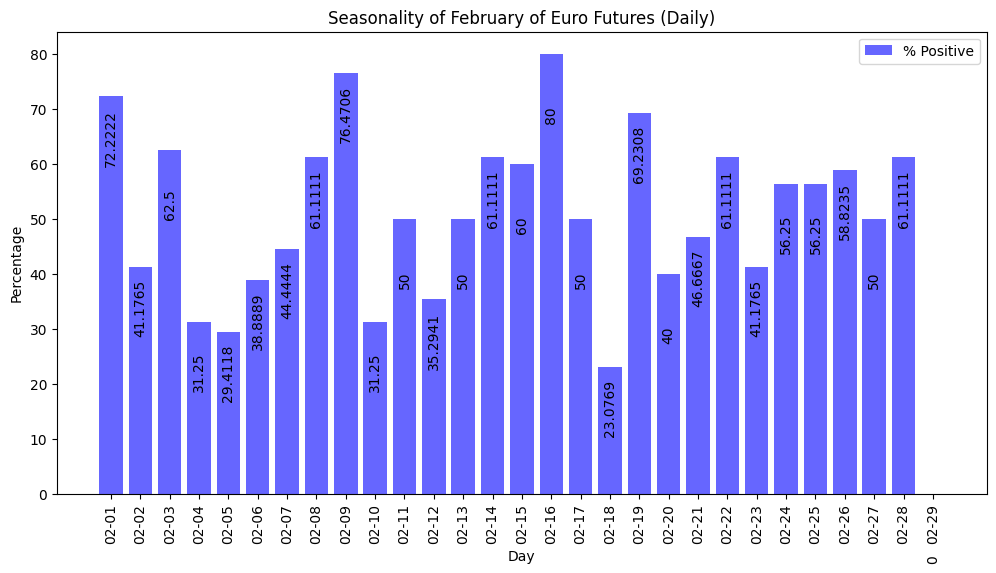

In [50]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(feb.index, feb['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of February of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

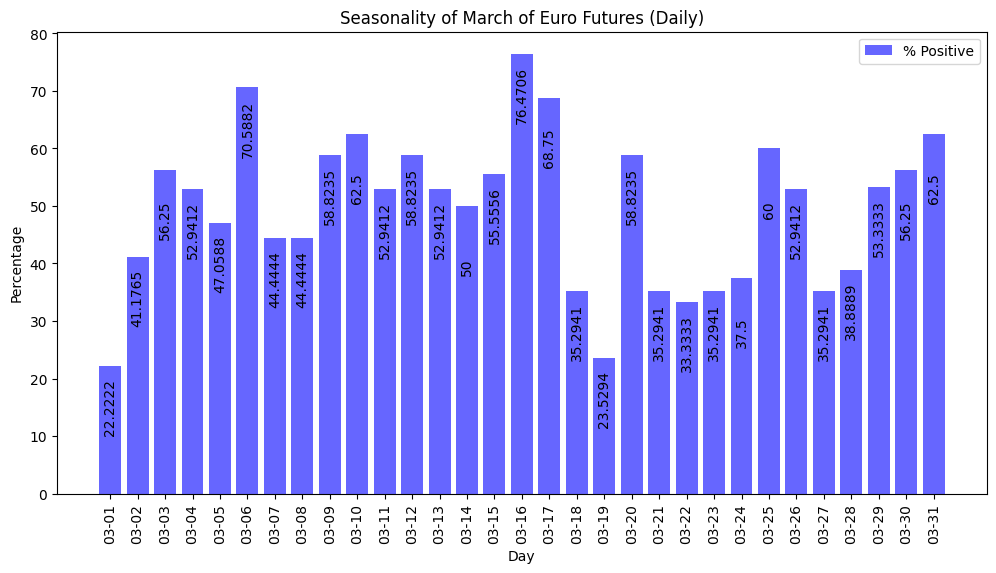

In [51]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(March.index, March['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of March of Euro Futures (Daily)')
plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

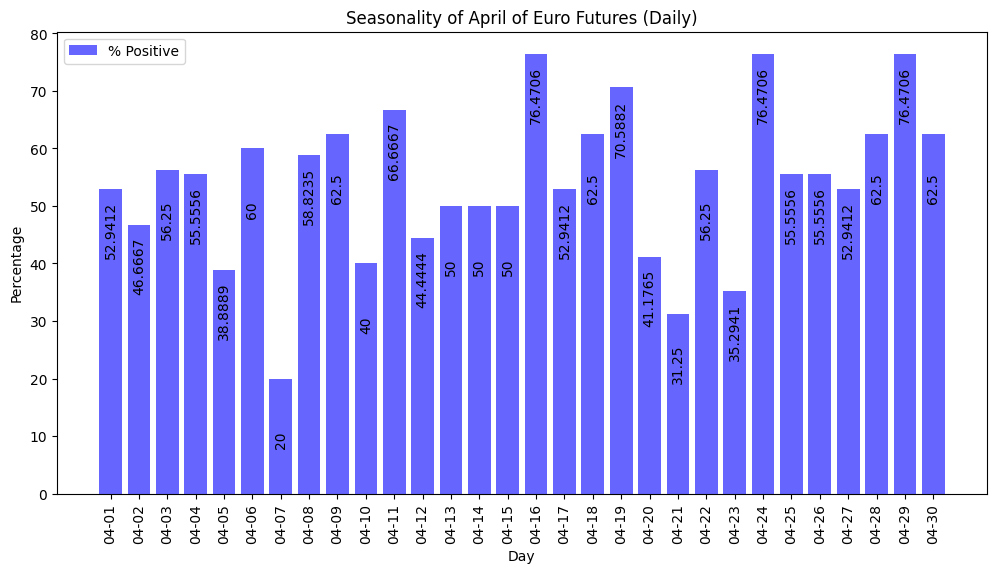

In [52]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(April.index, April['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of April of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

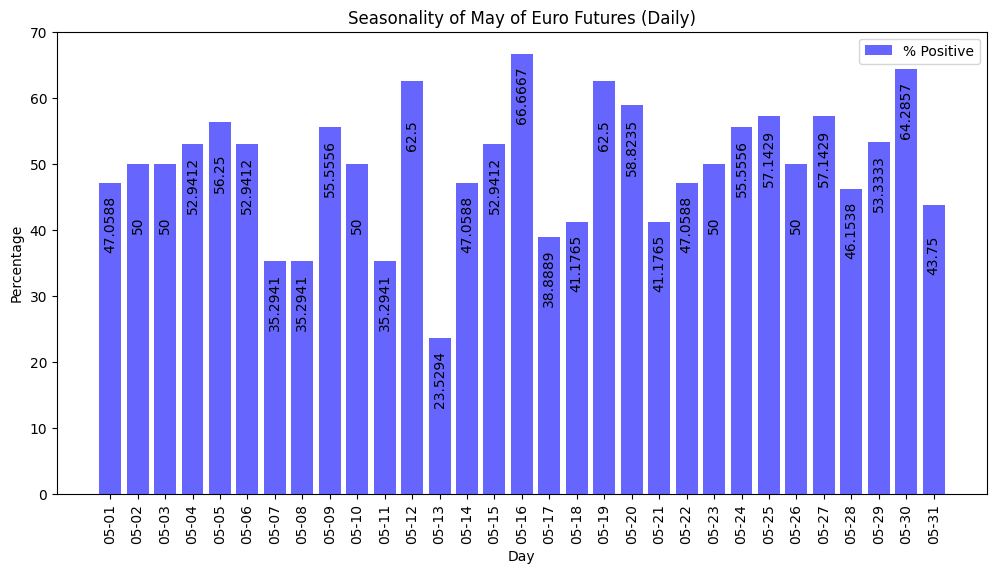

In [53]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(May.index, May['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of May of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

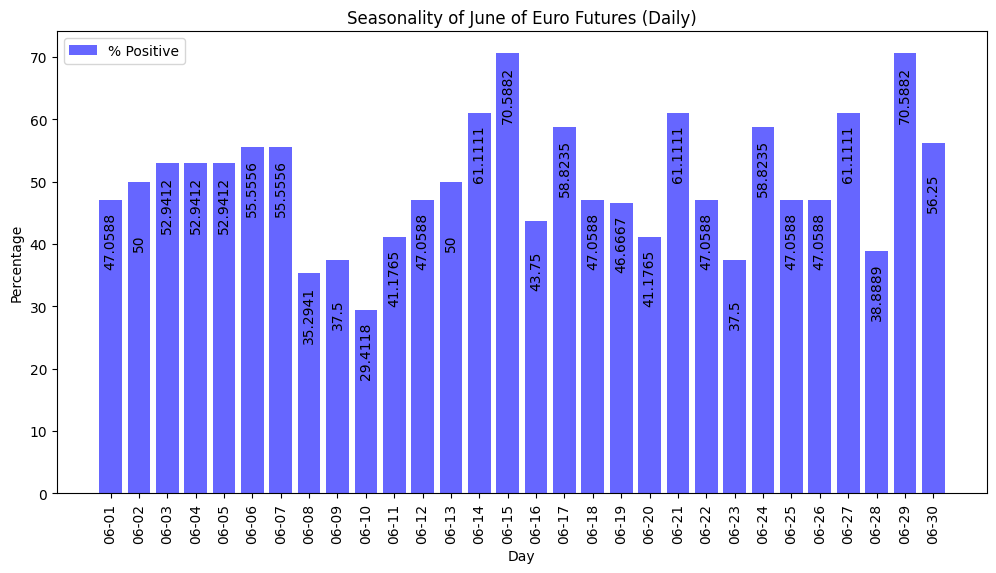

In [54]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(June.index, June['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of June of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

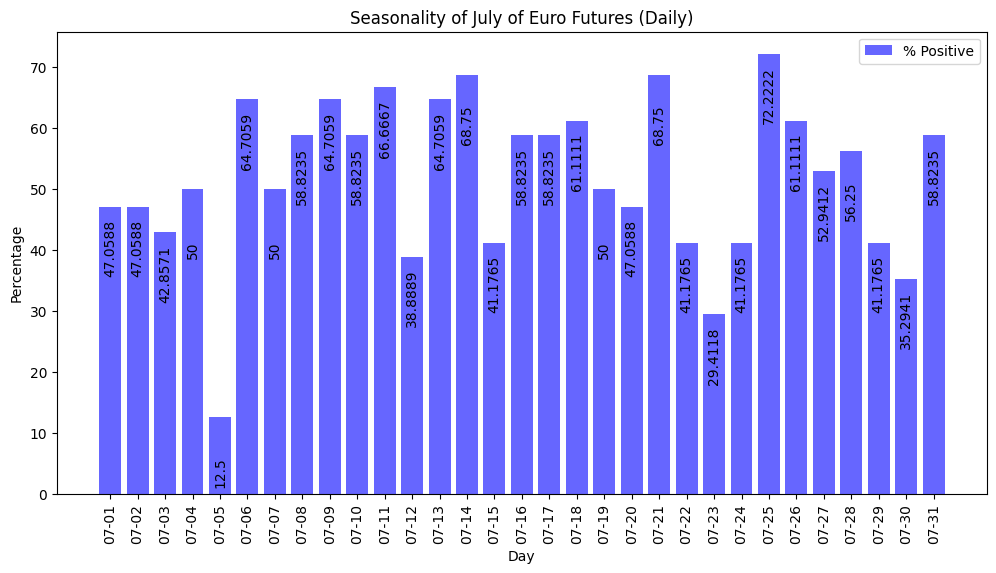

In [55]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(July.index, July['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of July of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

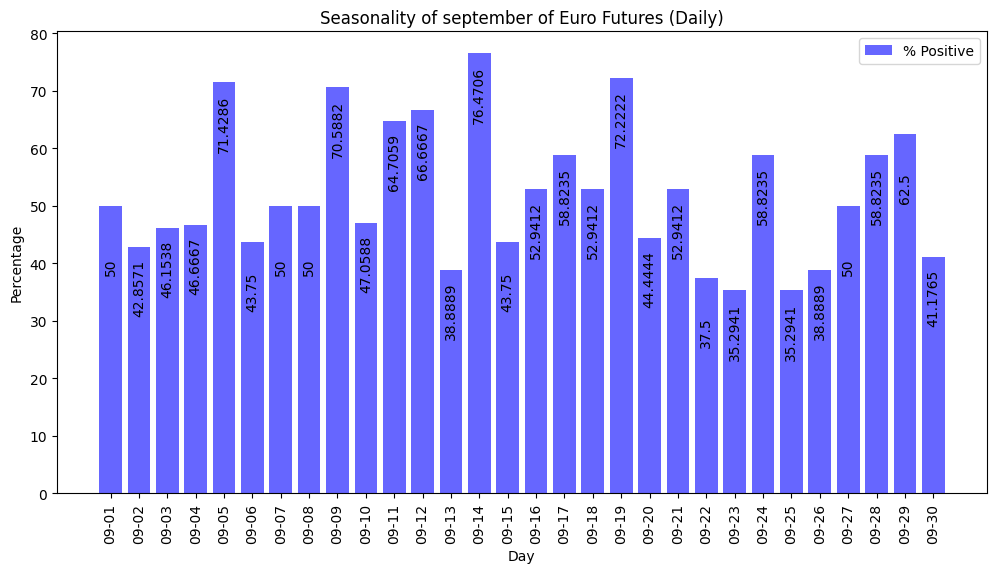

In [56]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(Sept.index, Sept['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of september of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

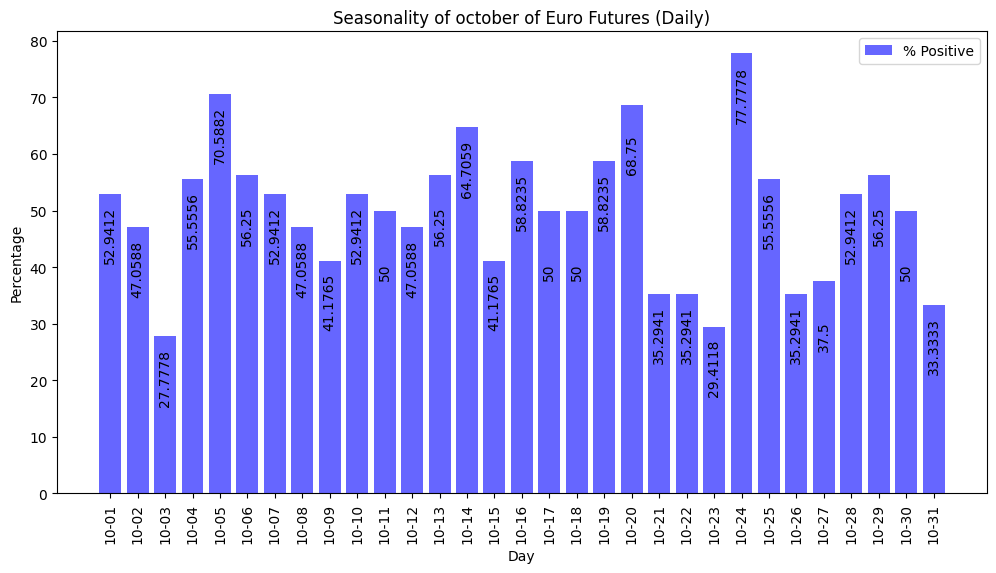

In [57]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(oct.index, oct['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of october of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

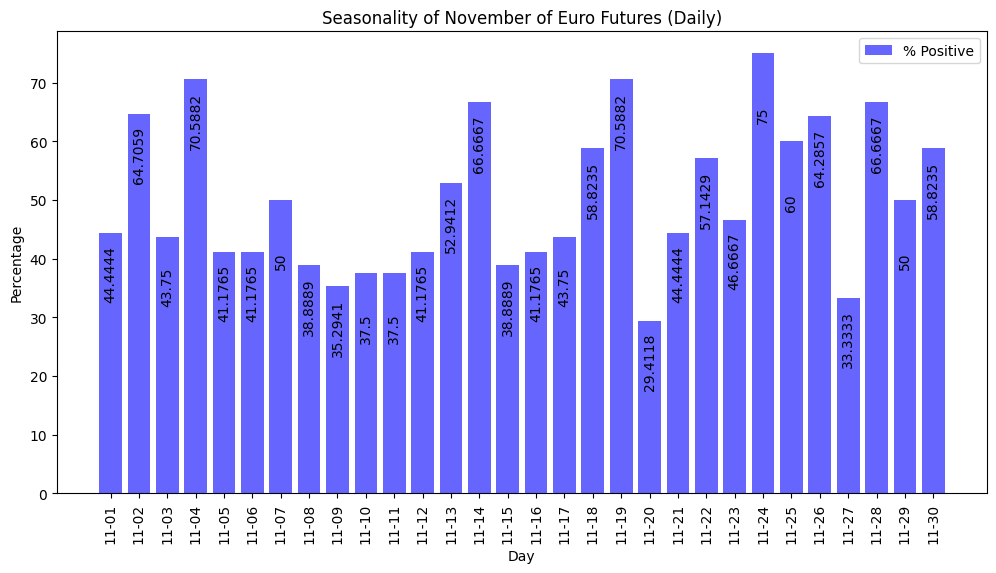

In [58]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(Nov.index, Nov['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of November of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

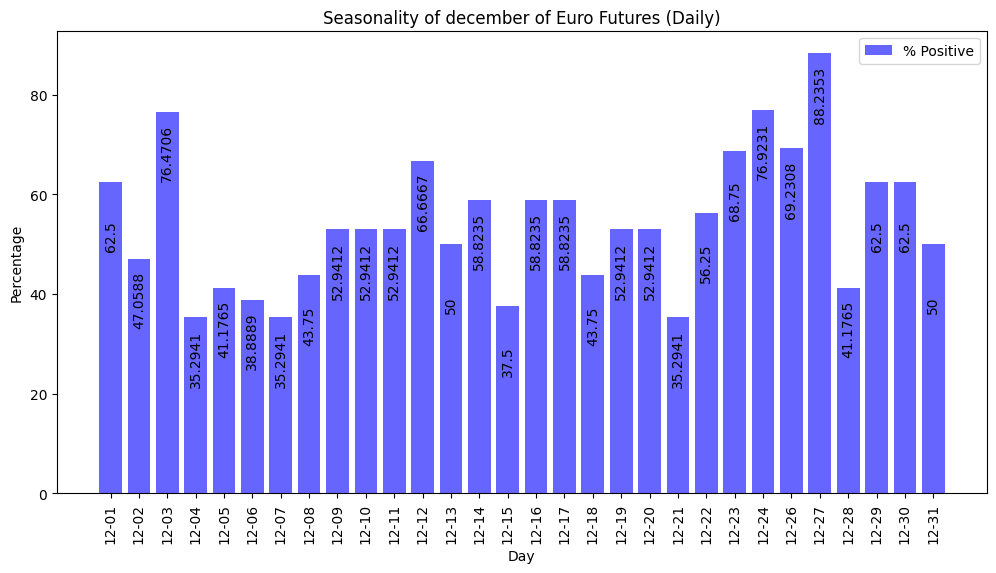

In [59]:
# Graficar el histograma para la temporada diaria
plt.figure(figsize=(12, 6))
barras = plt.bar(Dec.index, Dec['Percentage_Positive'], label='% Positive', color='blue', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Seasonality of december of Euro Futures (Daily)')

plt.bar_label(barras, padding=-50, color='black', rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Time series plot

In [5]:
start=dt.datetime(2001,1,1)
end = dt.datetime.now()
df = descargar_datos_forex('6E=F', start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Date     Open     High      Low    Close
0    2001-01-02  0.93910  0.95750  0.94760  0.95470
1    2001-01-03  0.94760  0.96120  0.93850  0.95720
2    2001-01-04  0.95720  0.95740  0.95150  0.95620
3    2001-01-05  0.95280  0.96360  0.95730  0.96330
4    2001-01-08  0.95730  0.96360  0.95450  0.95570
...         ...      ...      ...      ...      ...
6049 2024-12-11  1.05290  1.05415  1.04820  1.04935
6050 2024-12-12  1.04990  1.05315  1.04645  1.04735
6051 2024-12-13  1.04675  1.05245  1.04535  1.04945
6052 2024-12-16  1.04960  1.05245  1.04760  1.04915
6053 2024-12-17  1.05530  1.05770  1.05215  1.05380

[6054 rows x 5 columns]

Para sacar el gráfico necesito un df con "año", "mes" y "close"

In [12]:
series_df = pd.DataFrame()
series_df['month'] = df['Date'].dt.month
series_df['year'] = df['Date'].dt.year
series_df['close'] = df['Close']

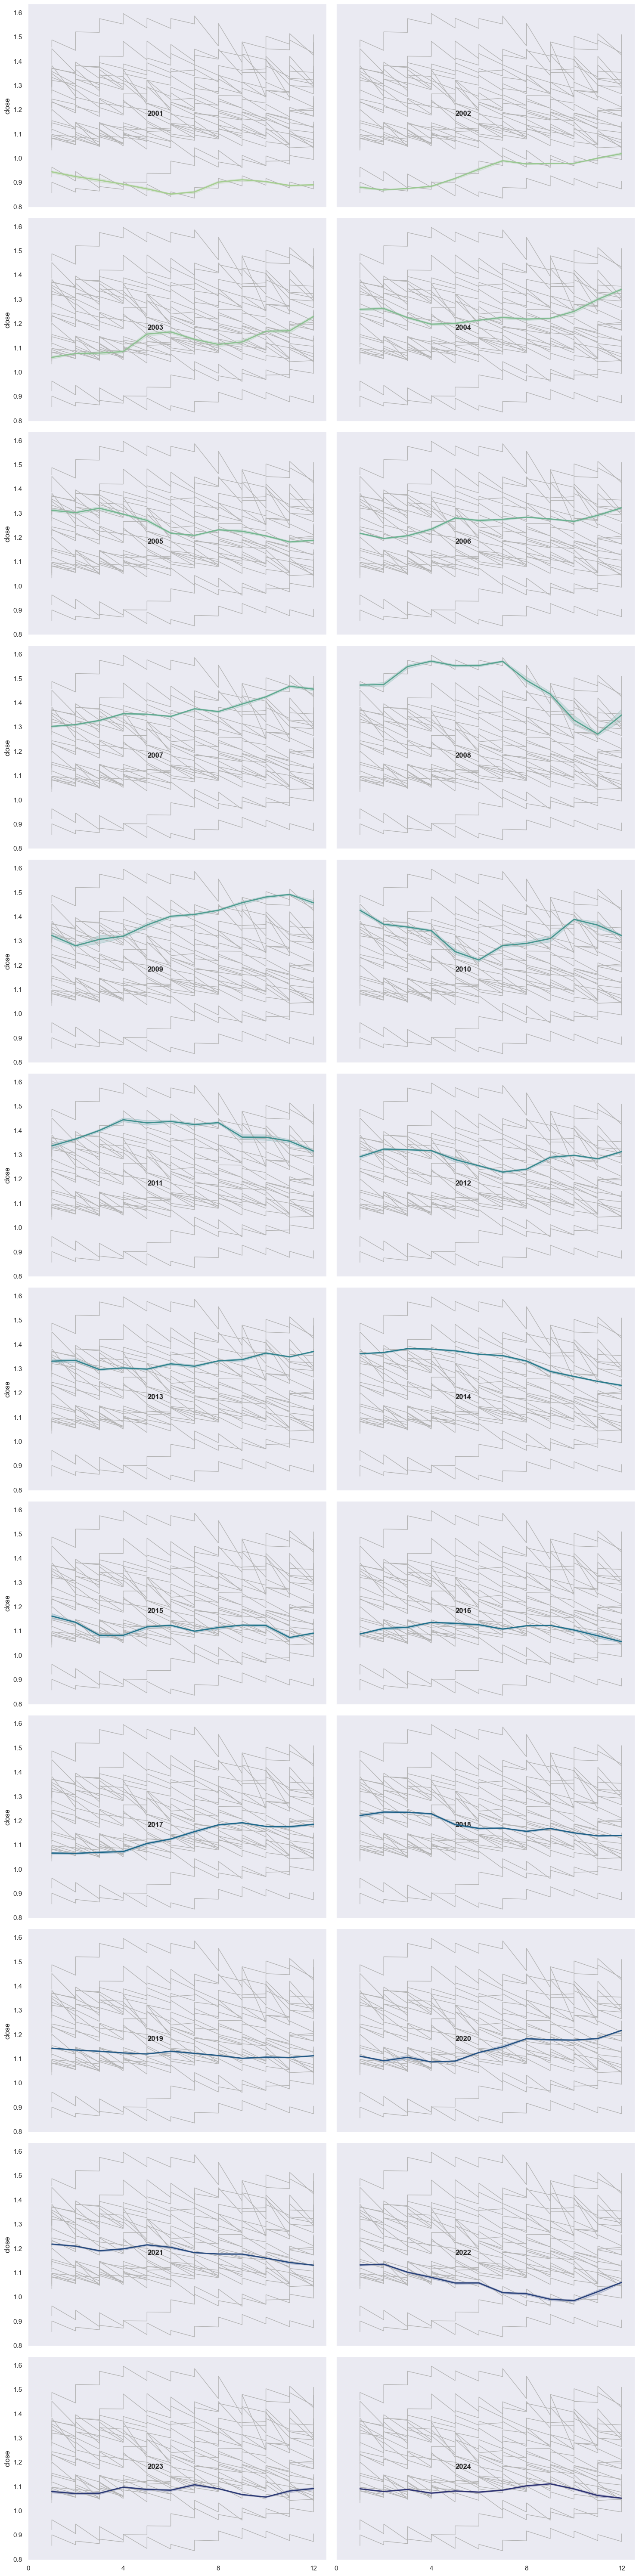

In [16]:
import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=series_df,
    x="month", y="close", col="year", hue="year",
    kind="line", palette="crest", linewidth=2, zorder=5,
    col_wrap=2, height=5, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.4, .45, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=series_df, x="month", y="close", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "close")
g.tight_layout()